## 그리디 알고리즘

* 그리디 알고리즘(탐욕법)은 현재 상황에서 지금 당장 좋은 것만 고르는 방법을 의미한다.
* 일반적인 그리디 알고리즘은 문제를 풀기 위한 최소한의 아이디어를 떠올릴 수 있는 능력을 요구한다.
* 그리디 해법은 그 정당성 분석이 중요하다.
    * 단순히 가장 좋아 보이는 것을 반복적으로 선택해도 최적의 해를 구할 수 있는지 검토한다.

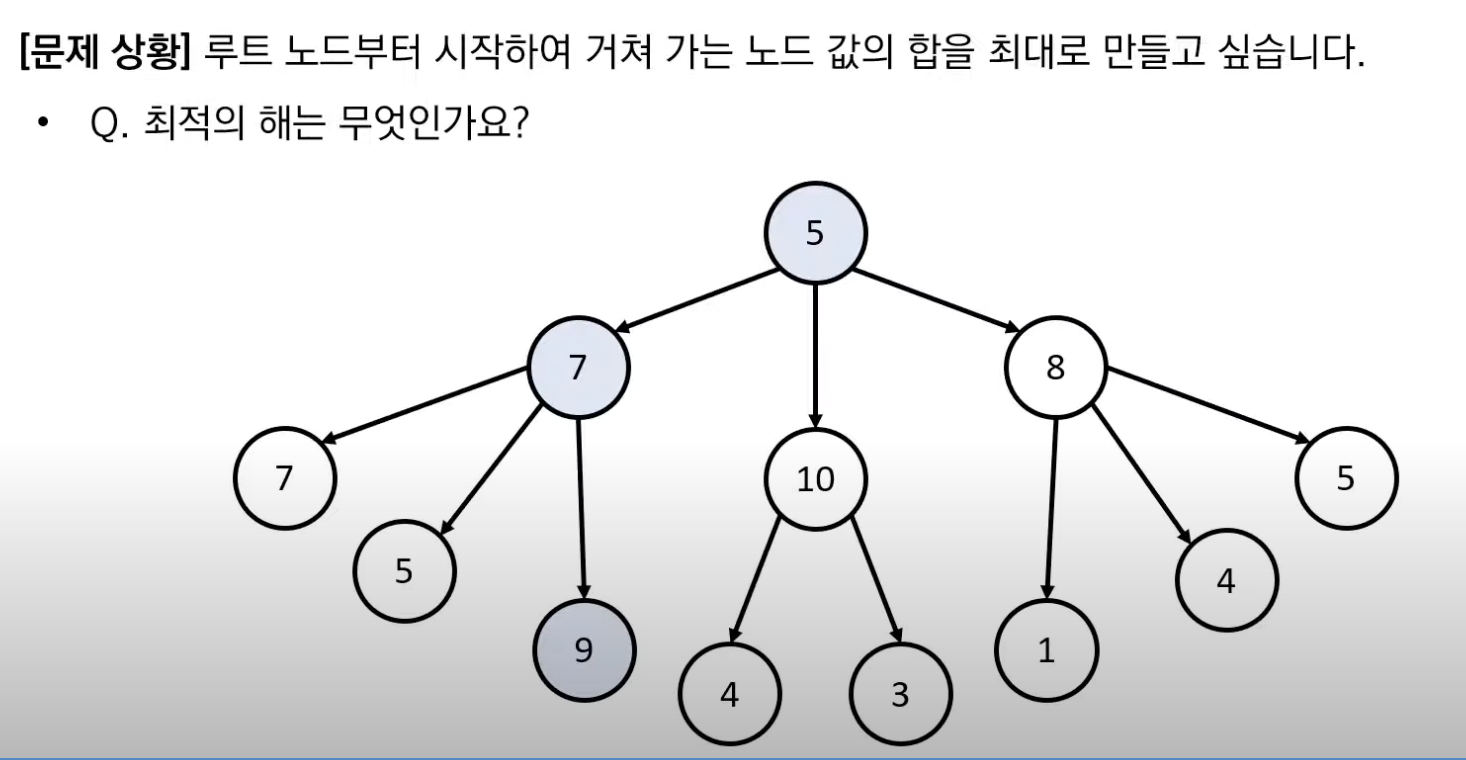

단순히 매 상황에서 가장 큰 값만 고르면 5 - 10 - 4 로 가장 큰 해를 구할 수 없다.

* 일반적인 상황에서 그리디 알고리즘은 최적의 해를 보장할 수 없을 때가 많다.
* 하지만 코딩 테스트에서의 대부분의 그리디 문제는 탐욕법으로 얻은 해가 최적의 해가 되는 상황에서, 이를 추론할 수 있어야 풀리도록 출제된다.

## <문제> 거스름 돈

#### 당신은 음식점의 계산을 도와주는 점원입니다. 카운터에는 거스름돈으로 사용할 500원, 100원, 50원, 10원짜리 동전이 무한히 존재한다고 가정합니다. 손님에게 거슬러 주어야 할 돈이 N원일 때 거슬러 주어야 할 동전의 최소 개수를 구하세요. 단, 거슬러 줘야할 돈 N은 항상 10의 배수입니다.

#### 문제 해결 아이디어
* 최적의 해를 빠르게 구하기 위해서는 **가장 큰 화폐 단위부터** 돈을 거슬러 주면 된다.
* N원을 거슬러 줘야 할 때, 가장 먼저 500원으로 거슬러 줄 수 있을 만큼 거슬러 준다.
    * 이후에 100원, 50원, 10원짜리 동전을 차례대로 거슬러 줄 수 있을 만큼 거슬러 주면 된다.
* N = 1260일 때의 예시를 확인해 보자.
|화폐단위|500|100|50|10|
|:---:|:---:|:---:|:---:|:---:|
|손님이 받은 개수|2|2|1|1|


#### 답안 예시

In [2]:
n = 1260
count = 0

# 큰 단위의 화페부터 차례대로 확인하기
array = [500, 100, 50, 10]

for coin in array:
    count += n//coin
    n %= coin
    
print(count)

6


#### 정당성 분석

* 가장 큰 화폐 단위부터 돈을 거슬러 주는 것이 최적의 해를 보장하는 이유는 무엇일까?
    * 가지고 있는 동전 중에서 **큰 단위가 항상 작은 단위의 배수이므로 작은 단위의 동전들을 종합해 다른 해가 나올 수 없기 때문**이다.
* 만약에 800원을 거슬러 주어야 하는데 화폐 단위가 500원, 400원, 100원이라면 어떻게 될까? - 400원짜리 2개일때가 최소이다.
* 그리디 알고리즘 문제에서는 이처럼 문제 풀이를 위한 최소한의 아이디어를 떠올리고 이것이 정당한지 검토할 수 있어야 한다.

#### 시간복잡도 분석

* 화폐의 종류가 K라고 할 때, 소스코드의 시간 복잡도는 O(K)이다.
* 이 알고리즘의 시간 복잡도는 거슬러줘야 하는 금액과는 무관하며, 동전의 총 종류에만 영향을 받는다.


## <문제> 1이 될때까지

#### 어떠한 수 N이 1이 될때까지 다음의 두 과정 중 하나를 반복적으로 선택하여 수행하려고 합니다. 단, 두번째 연산은 N이 K로 나누어 떨어질 때만 선택할 수 있습니다.
    1. N에서 1을 뺍니다.
    2. N을 K로 나눕니다.
#### 예를들어 N이 17, K가 4라고 가정하바시다. 이때 1번의 과정을 한 번 수행하면 N은 16이 됩니다. 이후에 2번의 과정을 두 번 수행하면 N은 1이 됩니다. 결과적으로 이 경우 전체 과정을 실행한 횟수는 3이 됩니다. 이는 N을 1로 만드는 최소 횟수입니다.
#### N과 K가 주어질 때 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 최소 횟수를 구하는 프로그램을 작성하세요.

#### 문제 해결 아이디어

* 주어진 N에 대하여 최대한 많이 나누기를 수행하면 된다.
* N의 값을 줄일 때 2이상의 수로 나누는 작업이 1을 빼는 작업보다 수를 훨씬 많이 줄일 수 있다.
* 예를 들어 N = 25, K = 3일 때는 다음과 같다.
|단계|연산과정|N의 값|
|:---:|:---:|:---:|
|0단계(초기단계)||N = 25|
|1단계|N에서 1 빼기|N = 24|
|2단계|N을 K로 나누기|N = 8|
|3단계|N에서 1 빼기|N = 7|
|4단계|N에서 1 빼기|N = 6|
|5단계|N을 K로 나누기|N = 2|
|6단계|N에서 1 빼기|N = 1|

#### 답안 예시

In [4]:
# N, K을 공백을 기준으로 구분하여 입렵받기
n, k = map(int, input().split())

result = 0

while True:
    # N이 K로 나누어 떨어지는 수가 될 때까지 빼기
    target = (n//k)*k  # 나누어 떨어지는 수를 target으로 설정
    result += (n - target)  # 1을 뺀만큼 result에 추가
    n = target
    
    # n이 K보다 작을때 (더이상 나눌 수 없을때) 반복문 탈출
    if n < k:
        break
    # k로 나누기    
    result += 1
    n //= k
    
# 마지막으로 남은 수에 대하여 1씩 빼기
result += (n - 1)
print(result)

25 3
6


#### 정당성 분석

* 가능하면 최대한 많이 나누는 작업이 최적의 해를 항상 보장할 수 있을까?
* N이 아무리 큰 수여도 K로 계속 나누면 기하급수적으로 빠르게 줄일 수 있다.
* 다시 말해 K가 2 이상이기만 하면, K로 나누는 것이 1을 빼는 것보다 항상 빠르게 N을 줄일 수 있다.
    * 또한 N은 항상 1에 도달하게 된다.(최적의 해 성립)

## <문제> 곱하기 혹은 더하기

#### 각 자리가 숫자(0부터 9)로만 이루어진 문자열 S가 주어졌을 때, 왼쪽부터 오른쪽으로 하나씩 모든 숫자를 확인하며 숫자 사이에 'X' 혹은 '+' 연산자를 넣어 결과적으로 만들어질 수 있는 가장 큰 수를 구하는 프로그램을 작성하세요. 단, +보다 X를 먼저 계산하는 일반적인 방식과는 달리, 모든 연산은 왼쪽에서부터 순서대로 이루어진다고 가정합니다.
#### 예를 들어 02984라는 문자열로 만들 수 있는 가장 큰 수는 ((((0+2) X 9) X 8) X 4) = 576입니다. 또한 만들어질 수 있는 가장 큰 수는 항상 20억 이하의 정수가 되도록 입력이 주어집니다.

#### 문제 해결 아이디어
* 대부분의 경우 '+'보다는 'X'가 더 값을 크게 만든다.
* 두 수 중에서 하나라도 '0' 혹은 '1'인 경우 곱하기 보다는 더하기 수행한다.


In [5]:
data = input()

# 첫 번째 문자를 숫자로 변경하여 대입
result = int(data[0])

for i in range(1, len(data)):
    num = int(data[i])
    if num <= 1 or result <= 1:
        result += num
    else:
        result += num
print(result)

02984
23


## <문제> 모험가 길드

#### 한 마을에 모험가가 N명 있습니다. 모험가 길드에서는 N명의 모험가를 대상으로 '공포도'를 측정했는데, '공포도'가 높은 모험가는 쉽게 공포를 느껴 위험 상황에서 제대로 대처할 능력이 떨허집니다.
#### 모험가 길드장인 진호는 모험가 그룹을 안전하게 구성하고자 공포도가 X인 모험가는 반드시 X명 이상으로 구성한 모험가 그룹에 참여해야 여행을 떠날 수 있도록 규정했습니다.
#### 진호는 최대 몇개의 모험가가 그룹을 만들 수 잇는지 궁금합니다. N명의 모함가에 대한 정보가 주어졌을 때, 여행을 떠날 수 있는 그룹 수의 최댓값을 구하는 프로그램을 작성하세요.
#### 예를 들어 N = 5 이고, 각 모험가의 공포도가 다음과 같다고 가정합시다.
* 2 3 1 2 2

#### 이 경우 그룹 1에 공포도가 1,2,3인 모험가를 한 명씩 넣고, 그룹 2에 공포도가 2인 남은 두명을 넣게되면 총 2개의 그룹을 만들 수 있습니다.
#### 또한 몇 명의 모험가는 마을에 그대로 남아 있어도 되기 때문에, 모든 모험가를 특정한 그룹에 넣을 필요는 없습니다.


#### 문제 해결 아이디어
* 앞에서 부터 공포도를 하나씩 확인하며 '현재 그룹에 포함된 모험가의 수'가 '현재 확인하고 있는 공포도'보다 크거나 같다면 이를 그룹으로 설정하면 된다.
* 이러한 방법을 이용하려면 공포도가 오름차순으로 정렬되어 있다는 점에서, 항상 최소한의 모험가의 수만 포함하여 그룹을 결성하게 된다.

In [6]:
n = input()
data = list(map(int, input().split()))
data.sort()

result = 0 # 총 그룹의 수
count = 0 # 현재 그룹에 포함된 모험가의 수

for i in data:
    count+=1
    if count>=i:
        result+=1
        count = 0

print(result)

5
2 3 1 1 2
3


## 구현(Implemnetation)

* 풀이를 떠올리는 것은 쉽지만 소스코드로 옮기기 어려운 문제를 지칭
    * 알고리즘은 간단한데 코드가 지나칠 만큼 길어지는 문제
    * 실수 연산을 다루고, 특정 소수점 자리까지 풀력해야 하는 문제
    * 문자열을 특정한 기준에 따라서 끊어 처리해야 하는 문제
    * 적절한 라이브러리를 찾아서 사용해야 하는 문제
    
* 일반적으로 알고리즘 문제에서의 2차원 공간은 행렬(Matrix)의 의미로 사용된다.

In [10]:
for i in range(5):
    for j in range(5):
        print('(',i,', ',j,')', end=' ')
    print()

( 0 ,  0 ) ( 0 ,  1 ) ( 0 ,  2 ) ( 0 ,  3 ) ( 0 ,  4 ) 
( 1 ,  0 ) ( 1 ,  1 ) ( 1 ,  2 ) ( 1 ,  3 ) ( 1 ,  4 ) 
( 2 ,  0 ) ( 2 ,  1 ) ( 2 ,  2 ) ( 2 ,  3 ) ( 2 ,  4 ) 
( 3 ,  0 ) ( 3 ,  1 ) ( 3 ,  2 ) ( 3 ,  3 ) ( 3 ,  4 ) 
( 4 ,  0 ) ( 4 ,  1 ) ( 4 ,  2 ) ( 4 ,  3 ) ( 4 ,  4 ) 


## <문제> 상하좌우

#### 여행가 A는 N X N크기의 정사각형 공간 위에 서 있습니다. 이 공간은 1X1 크기의 정사각형으로 나누어져 있습니다. 가장 왼쪽 위 좌표는 (1,1) 이며, 가장 오른쪽 아래 좌표는 (N,N)에 해당합니다. 여행가 A는 상, 하, 좌, 우 방향으로 이동 할 수 있으며, 시작 좌표는 항상(1,1) 입니다. 우리 앞에는 여행가 A가 이동 할 계획이 적힌 계획서가 놓여 있습니다.
#### 계획서에는 하나의 줄에 띄어쓰기를 기준으로 하여 L, R, U, D중 하나의 문자가 반복적으로 적혀있습니다. 각 문자의 의미는 다음과 같습니다.
* L: 왼쪽으로 한 칸 이동
* R: 오른쪽으로 한 칸 이동
* U: 위로 하나칸 이동
* D: 아래로 한 칸 이동

#### 이때 여행가 A가 N X N크기의 정사각형 공간을 벗어나는 움직임은 무시됩니다. 예를들어 (1,1)위치에서 L, U를 만나면 무시됩니다.

#### 문제 해결 아이디어

* 이 문제는 요구사항대로 충실히 구현하면 되는 문제이다.
* 일련의 명령에 따라서 개체를 차례대로 이동시킨다는 점에서 시뮬레이션(simulation)유형으로도 분류되며 구현이 중요한 대표적인 문제유형이다.


In [11]:
# n 입력받기
n = int(input())
x, y = 1, 1
plans = input().split()

# L, R, U, D에 따른 이동방향
dx = [0, 0, -1, 1]
dy = [-1, 1, 0, 0]
move_types = ['L', 'R', 'U', 'D']

# 이동 계획을 하나씩 확인하기
for plan in plans:
    # 이동 후 좌표 구하기
    for i in range(len(move_types)):
        if plan == move_types[i]:
            nx = x + dx[i]
            ny = y + dy[i]
    # 공간을 벗어나는 경우 무시
    if nx < 1 or ny < 1 or nx > n or ny > n:
        continue
    # 이동 수행
    x, y = nx, ny
print(x, y)

7
R U D D R R L U D
3 3


## <문제> 시각

#### 정수 N이 입력되면 00시 00분 00초부터 N시 59분 59초 까지의 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수를 구하는 프로그램을 작성하세요. 예를들어 1을 입력했을 때 다음은 3이 하나라도 포함되어 있으므로 세어야 하는 시각입니다.
    * 00시 00분 03초
    * 00시 13분 30초
#### 반면 다음은 3이 하나라도 포함되어 있지 않으므로 세면 안되는 시각입니다.
    * 00시 02분 55초
    * 01시 27분 45초


#### 문제 해결 아이디어
* 이 문제는 가능한 모든 시각의 경우를 하나씩 모두 세서 풀 수 있는 문제이다.
* 하루는 86400초이므로, 00시 00분 00초부터 23시 59분 59초까지의 모든 경우는 86400가지 이다.
* 따라서 단순히 시각을 1씩 증가시키면서 3이 하나라도 포함되어 있는지를 확인하면 된다.
* 이러한 유형은 완전 탐색 문제유형(Brute Forcing)이라고 불린다.
    * 가능한 경우의 수를 모두 검사해보는 탐색 방법을 의미한다.

In [3]:
# H 입력 받기
h = int(input())
count = 0
for i in range(h+1):
    for j in range(60):
        for k in range(60):
            # 3이 있다면 카운트 증가
            if '3' in str(i) + str(j) + str(k):
                count += 1
print(count)

16
30825


## <문제> 왕실의 나이트

#### 행복 왕국의 왕실 정원은 체스판과 같은 8X8 좌표 평면 입니다. 왕실의 정원의 특정한 칸에 나이트가 서있습니다. 나이트는 매우 충성스러운 신하로서 매일 무술을 연마합니다.
#### 나이트는 말을 타고 있기 때문에 이동을 할 때는 L자 형태로만 이동할 수 있으며 정원 밖으로는 나갈 수 없습니다.
#### 나이트는 특정 위치에서 다음과 같은 2가지 경우로 이동할 수 있습니다
    1. 수평으로 두칸 이동한 뒤에 수직으로 한칸 이동하기
    2. 수직으로 두 칸 이동한 뒤에 수평으로 한 칸 이동하기
#### 이처럼 8X8 좌표 평면상에서 나이트의 위치가 주어졌을 때 나이트가 이동할 수 있는 경우의 수를 출력하는 프로그램을 작성하세요. 왕실의 정원에서 행 위치를 표현할 때는 1부터 8로 표현하며, 열 위치를 표현할때는 A부터 H로 표현합니다.
    * c2에 있을 때 이동할 수 있는 경우의 수는 6가지 입니다.

In [7]:
# 현재 나이트의 위치 입력받기
input_data = input()
row = int(input_data[1])
column = int(ord(input_data[0])) - int(ord('a')) + 1

# 나이트가 이동할 수 있는 8가지 방향 정의
steps = [(-2, -1), (-1, -2), (1, -2), (2, -1), (2, 1), (1, 2), (-1, 2), (-2, 1)]

# 8가ㅣㅈ 방향에 대하여 각 위치로 이동이 가능한지 확인
result = 0
for step in steps:
    # 이동하고자 하는 위치 확인
    next_row = row + step[0]
    next_column = column + step[0]
    # 해당 위치로 이동이 가능하다면 카운트 증가
    if next_row>=1 and next_row<=8 and next_column>=1 and next_column<=8:
        result+=1

print(result)

f6
8


## <문제> 문자열 재정렬

#### 알파벳 대문자와 숫자(0 ~ 9)로만 구성된 문자열이 입력으로 주어집니다. 이때 모든 알파벳을 오름차순으로 정렬하여 이어서 출력한 뒤에, 그 뒤에 모든 숫자를 더한 값을 이어서 출력한다.
#### 예를 들어 K1KA5CB7이라는 값이 들어오면 ABCKK13을 출력합니다.


#### 문제 해결 아이디어

* 요구사항대로 충시맇 구현하면 되는 문제이다.
* 문자열이 입력되었을 때 문자를 하나씩 확인한다.
    * 숫자인 경우 따로 합계를 계산
    * 알파벳은 경우 별도의 리스트에 저장.
* 결과적으로 리스트에 저장된 알파벳을 정렬해 출력하고, 합계를 뒤에 붙여 출력하면 정답이다.

In [12]:
data = input()
result = []
value = 0

# 문자를 하나씩 확인하며
for x in data:
    # 알파벳인 경우에 리스트에 삽입
    if x.isalpha():
        result.append(x)
    else:
        value += int(x)

# 알파벳을 정렬
result.sort()

# 숫자가 하나라도 존재하는 경우 가장 뒤에 삽입
if value!=0:
    result.append(str(value))
print(''.join(result))

K1KA5CB7
ABCKK13
